In [2]:
from google.colab import drive
from google.colab import files
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


# Prepare dataset

In [4]:
df = pd.read_csv("drive/My Drive/Diploma/second_try/wiki_current_events_detection/Code/data/features_eng.csv")
# the features_pl.csv is in the "data" folder
print(df.shape)
df.head(2)

(104828, 32)


Unnamed: 0.1  Unnamed: 0                              page_title      date  \
0             0           0                 Prime_Minister_of_Haiti  20220101   
1             1           1  2021%E2%80%932022_Boulder_County_fires  20220101   

   around  before        boost  same_day_views  prev_day_views  \
0     313     234     1.337607              36              75   
1    5643      -1 -5643.000000             591             591   

   week_before_views  ...  year_before_revs  week_after_revs  day_after_revs  \
0                345  ...              25.0              0.0             0.0   
1                591  ...               0.0              0.0             0.0   

   day_after_2_revs  subcategory  -1 Culture  Geography  History_and_Society  \
0               0.0      Regions   0       0          1                    0   
1               0.0      Regions   0       0          1                    0   

   STEM  
0     0  
1     0  

[2 rows x 32 columns]

In [8]:
from sklearn.model_selection import train_test_split

# split data into train and test sets
seed = 7
test_size = 0.33
df_train, df_test = train_test_split(df, test_size=test_size, random_state=seed)
# split data into X and y
X_train = df_train[[ "-1", "Culture",	"Geography",	"History_and_Society",	"STEM",
       'category_score', 'category', 'subcategory',
       'before'  , 'prev_day_views', 'week_before_views', 'month_before_views', 'year_before_views', # 'same_day_views' - same day - do not use, cause it will be -1 for today (api not updated)
       'same_day_revs', 'prev_day_revs', 'week_before_revs', 'month_before_revs', 'year_before_revs' #'same_day_revs' = prev day views (wrong naming),  'day_after_revs'=same day - do not use
       ]]
X_test = df_test[[ "-1", "Culture",	"Geography",	"History_and_Society",	"STEM",
       'category_score', 'category', 'subcategory',
       'before'  ,
       'prev_day_views', 'week_before_views', 'month_before_views',
       'year_before_views', 'same_day_revs', 
       'prev_day_revs', 'week_before_revs', 'month_before_revs',
       'year_before_revs' # 'day_after_revs','same_day_views'
       ]]


y_train = df_train['is_event']
y_test = df_test['is_event']

In [9]:
X_train['category'] = transform_category(X_train, 'category', X_train)
X_train['subcategory'] = transform_category(X_train, 'subcategory', X_train)

X_test['category'] = transform_category(X_train, 'category', X_test)
X_test['subcategory'] = transform_category(X_train, 'subcategory', X_test)

<ipython-input-9-d3a63f9193c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['category'] = transform_category(X_train, 'category', X_train)
<ipython-input-9-d3a63f9193c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['subcategory'] = transform_category(X_train, 'subcategory', X_train)
<ipython-input-9-d3a63f9193c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [10]:
X_train['part_views_week'] = X_train['prev_day_views']/ X_train['week_before_views']
X_train['part_views_month'] = X_train['prev_day_views']/ X_train['month_before_views']
X_train['part_revs_week'] = X_train['prev_day_revs']/ X_train['week_before_revs']
X_train['part_revs_month'] = X_train['prev_day_revs']/ X_train['month_before_revs']

<ipython-input-10-08f180ad9ab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['part_views_week'] = X_train['prev_day_views']/ X_train['week_before_views']
<ipython-input-10-08f180ad9ab6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['part_views_month'] = X_train['prev_day_views']/ X_train['month_before_views']
<ipython-input-10-08f180ad9ab6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [11]:
X_test['part_views_week'] = X_test['prev_day_views']/ X_test['week_before_views']
X_test['part_views_month'] = X_test['prev_day_views']/ X_test['month_before_views']
X_test['part_revs_week'] = X_test['prev_day_revs']/ X_test['week_before_revs']
X_test['part_revs_month'] = X_test['prev_day_revs']/ X_test['month_before_revs']

<ipython-input-11-0ee5a3428f2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['part_views_week'] = X_test['prev_day_views']/ X_test['week_before_views']
<ipython-input-11-0ee5a3428f2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['part_views_month'] = X_test['prev_day_views']/ X_test['month_before_views']
<ipython-input-11-0ee5a3428f2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [14]:
X_train.to_csv('X_train_en.csv')
y_train.to_csv('y_train_en.csv')
X_test.to_csv('X_test_en.csv')
y_test.to_csv('y_test_en.csv')

# Log reg

In [15]:
X_train  = X_train.fillna(0)
X_test  = X_test.fillna(0)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

threashold = 0.5005
y_pred_lr =  clf.predict_proba(X_test)[:, 1]
y_pred_binary = [int(value>threashold) for value in y_pred_lr]

print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     31414
           1       0.47      0.50      0.49      3180

    accuracy                           0.90     34594
   macro avg       0.71      0.72      0.72     34594
weighted avg       0.91      0.90      0.90     34594



In [ ]:
!pip install -q binclass-tools

In [ ]:
len(y_pred_lr)

34594

In [ ]:
import numpy as np
import bctools as bc
threshold_values = np.arange(0, 1, 0.05)
bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = y_pred_lr,
    N_subsets = 70,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)

optimized_metric  GHOST_optimal_threshold
0            kappa                     0.55
1              mcc                     0.55
2         f1_score                     0.50
3         f2_score                     0.00
4        f05_score                     0.55

In [ ]:
threshold_values = np.arange(0.45, 0.55, 0.0005)
bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = y_pred_lr,
    N_subsets = 70,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)

optimized_metric  GHOST_optimal_threshold
0            kappa                   0.5010
1              mcc                   0.5010
2         f1_score                   0.5005
3         f2_score                   0.5005
4        f05_score                   0.5030

In [ ]:
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc, roc_curve


precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

fig = px.area(
    x=recall, y=precision,
    title=f"Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})",
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

In [ ]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 10.4 MB/s eta 0:00:00


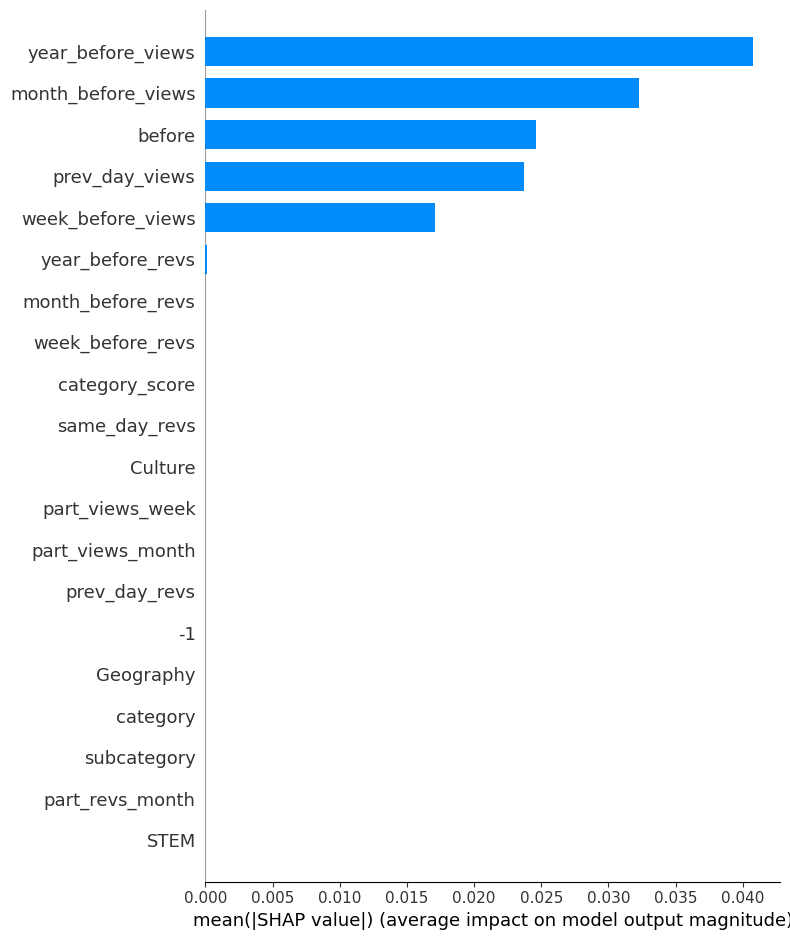

In [ ]:
import shap
explainer = shap.Explainer(clf, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


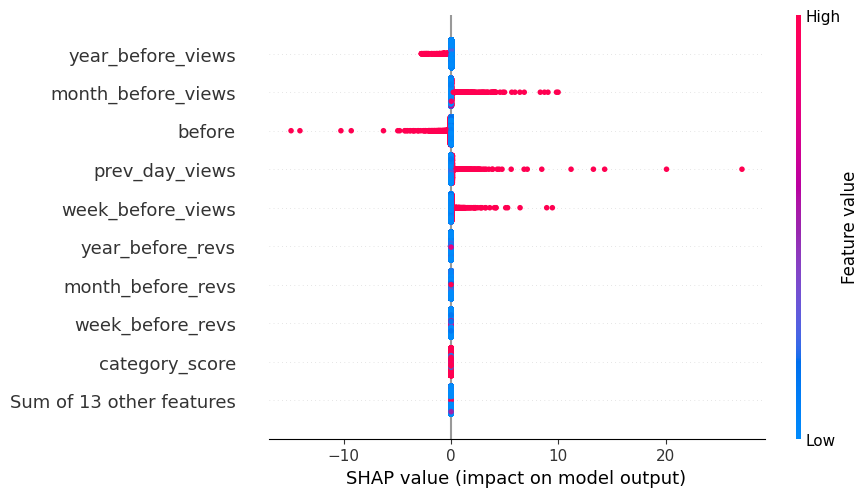

In [ ]:
shap.plots.beeswarm(shap_values)

# Random forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, max_depth=5, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)



threashold = 0.29
y_pred_rf =  rf.predict(X_test)#[:, 1]
y_pred_binary = [int(value>threashold) for value in y_pred_rf]
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     31414
           1       0.69      0.67      0.68      3180

    accuracy                           0.94     34594
   macro avg       0.83      0.82      0.82     34594
weighted avg       0.94      0.94      0.94     34594



In [ ]:
# recall 1, precision 0.1 threashold 0

threashold = 0
y_pred_binary = [int(value>=threashold) for value in y_pred_rf]
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     31414
           1       0.09      1.00      0.17      3180

    accuracy                           0.09     34594
   macro avg       0.05      0.50      0.08     34594
weighted avg       0.01      0.09      0.02     34594



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
threshold_values = np.arange(0, 1, 0.05)
bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = y_pred_rf,
    N_subsets = 70,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)

optimized_metric  GHOST_optimal_threshold
0            kappa                     0.30
1              mcc                     0.30
2         f1_score                     0.30
3         f2_score                     0.25
4        f05_score                     0.40

In [ ]:
threshold_values = np.arange(0.25, 0.35, 0.0005)
bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = y_pred_rf,
    N_subsets = 70,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)

optimized_metric  GHOST_optimal_threshold
0            kappa                     0.30
1              mcc                     0.30
2         f1_score                     0.29
3         f2_score                     0.25
4        f05_score                     0.34

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

fig = px.area(
    x=recall, y=precision,
    title=f"Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})",
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

 99%|===================| 34270/34594 [01:27<00:00]       

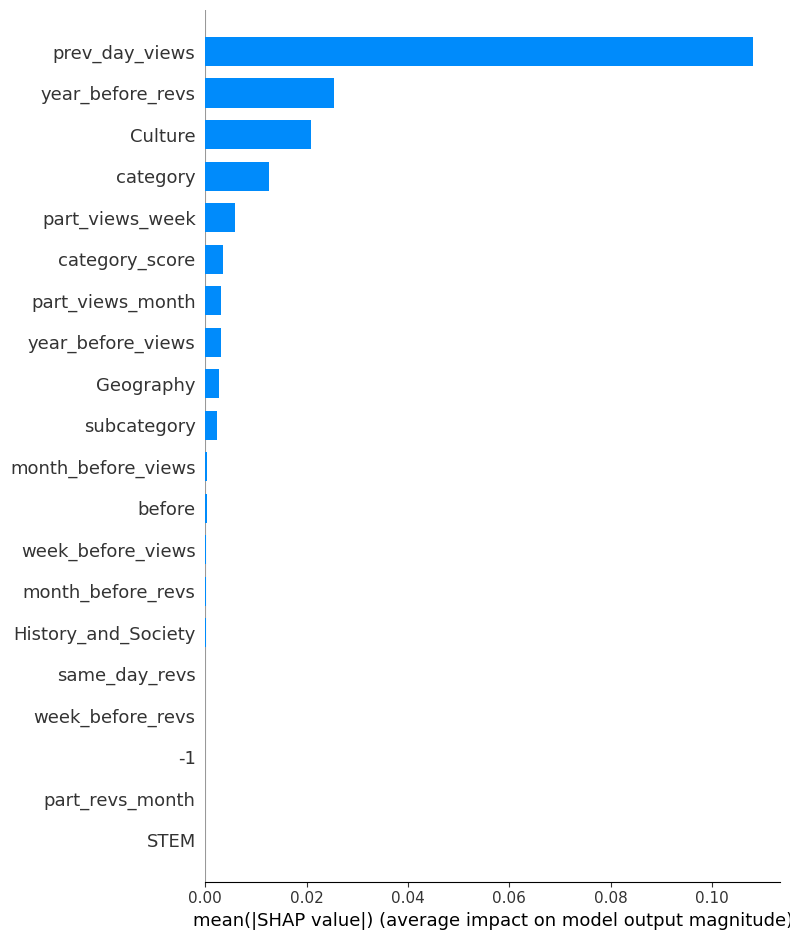

In [ ]:
import shap
explainer = shap.Explainer(rf, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap_values

NameError: ignored

# Xgboost

In [ ]:
# First XGBoost model 
from xgboost import XGBClassifier

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred_xg = model.predict_proba(X_test)[:, 1]

In [ ]:
threashold = 0.0065
predictions = [int(value>threashold) for value in y_pred_xg]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, predictions))

NameError: ignored

In [ ]:
threshold_values = np.arange(0, 1, 0.05)
bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = y_pred_xg,
    N_subsets = 70,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)

optimized_metric  GHOST_optimal_threshold
0            kappa                     0.05
1              mcc                     0.05
2         f1_score                     0.05
3         f2_score                     0.05
4        f05_score                     0.05

In [ ]:
threshold_values = np.arange(0, 0.1, 0.0005)
bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = y_pred_xg,
    N_subsets = 10,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)

optimized_metric  GHOST_optimal_threshold
0            kappa                   0.0080
1              mcc                   0.0080
2         f1_score                   0.0065
3         f2_score                   0.0025
4        f05_score                   0.0365

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xg)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xg)

fig = px.area(
    x=recall, y=precision,
    title=f"Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})",
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

100%|===================| 34527/34594 [03:11<00:00]       

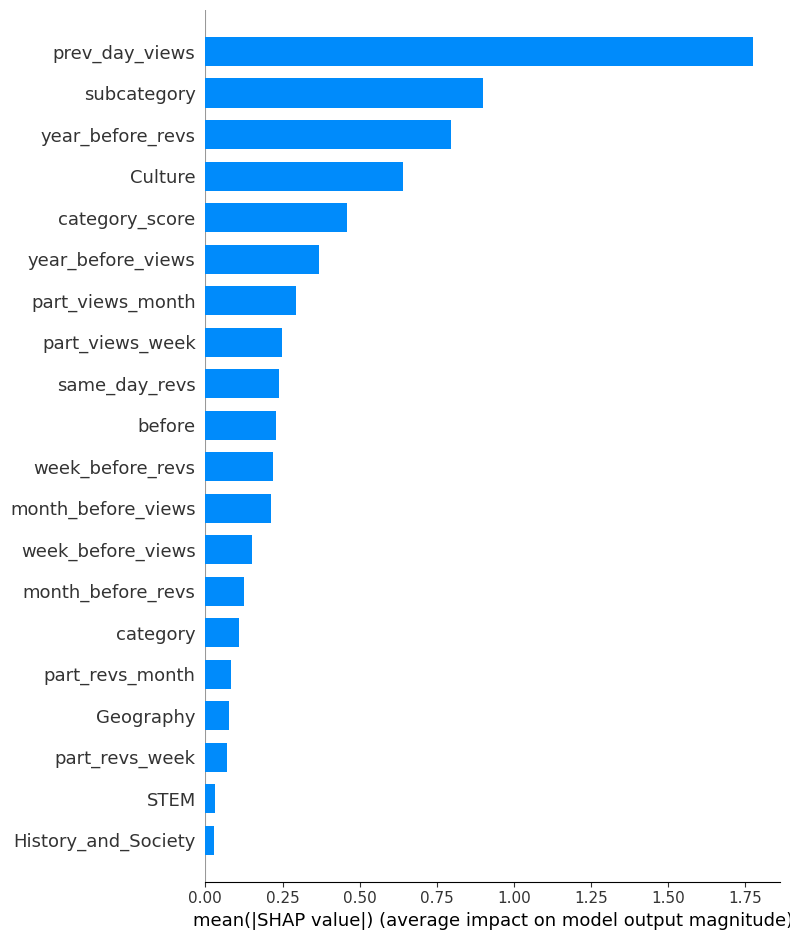

In [ ]:
import shap
explainer = shap.Explainer(model, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
df_test = df_test.reset_index()

In [ ]:
len((y_test==1))

34594

In [ ]:
df_test[(y_pred_xg<0.001)]['page_title'][100:150] # ,model predicted as news, and it is

191                                       Caroline_Plate
193                                        Phyllis_Bolds
197         2021–22_Nigeria_Professional_Football_League
200                                       Bolshoy_Morets
202    Version_1.0_Editorial_Team/Water_articles_by_q...
203                             Bristle-crowned_starling
206    Version_1.0_Editorial_Team/History_of_Brazil_a...
211                    Articles_for_deletion/Jose_Thenee
213                  WikiProject_Statistics/Hot_articles
215                                            Nadakumar
217                                      Wayne_Grimditch
218              Detective_Conan:_The_Bride_of_Halloween
219                   Good_articles/Art_and_architecture
222                      AlexNewArtBot/DeathSearchResult
226                                       FileSaveAs1010
227    2022_Première_ligue_de_soccer_du_Québec_fémini...
228                                        Matthewvetter
231                 AlexNewArtB

In [ ]:
X_test.iloc[5567,:]

-1                          0.000000
Culture                     1.000000
Geography                   0.000000
History_and_Society         0.000000
STEM                        0.000000
category_score              0.974831
category                    0.000000
subcategory                 0.000000
before                   4688.000000
prev_day_views           1781.000000
week_before_views        7629.000000
month_before_views      32960.000000
year_before_views      468209.000000
same_day_revs               0.000000
prev_day_revs               0.000000
week_before_revs            0.000000
month_before_revs           7.000000
year_before_revs          115.000000
part_views_week             0.233451
part_views_month            0.054035
part_revs_week                   NaN
part_revs_month             0.000000
Name: 82661, dtype: float64

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 17.6 MB/s eta 0:00:00


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


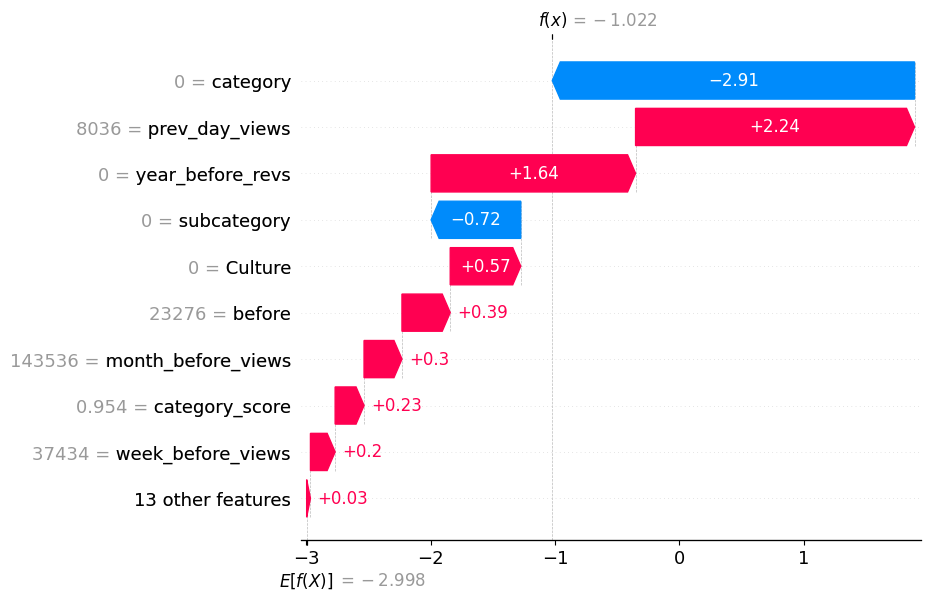

In [ ]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1908])

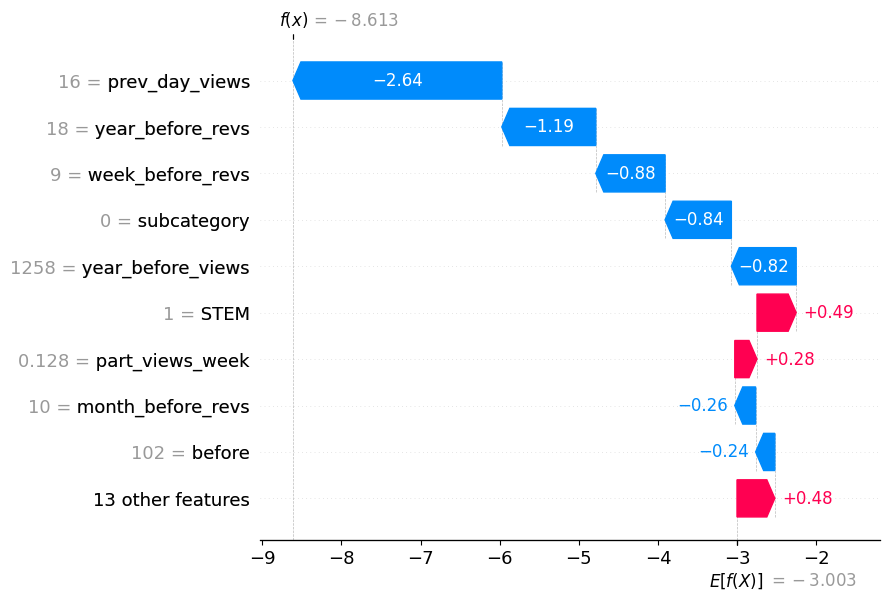

In [ ]:
shap.plots.waterfall(shap_values[270])

In [ ]:
df_test.columns

Index(['Unnamed: 0', 'page_title', 'date', 'around', 'before', 'boost',
       'same_day_views', 'prev_day_views', 'week_before_views',
       'month_before_views', 'year_before_views', 'day_after_views',
       'week_after_views', 'month_after_views', 'is_event', 'category',
       'category_score', 'same_day_revs', 'prev_day_revs', 'week_before_revs',
       'month_before_revs', 'year_before_revs', 'week_after_revs',
       'day_after_revs', 'day_after_2_revs', 'subcategory', '-1', 'Culture',
       'Geography', 'History_and_Society', 'STEM'],
      dtype='object')

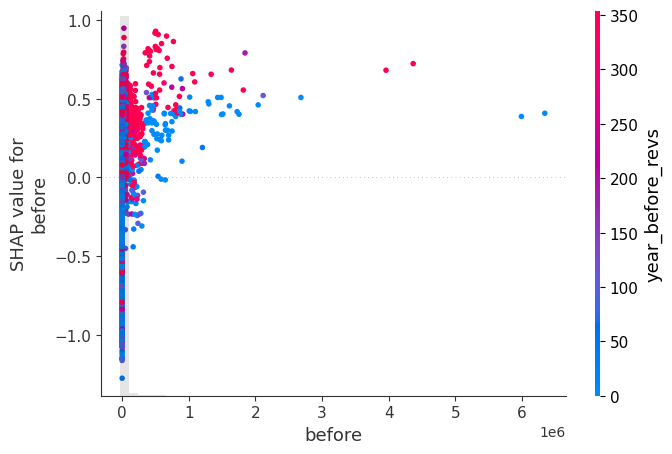

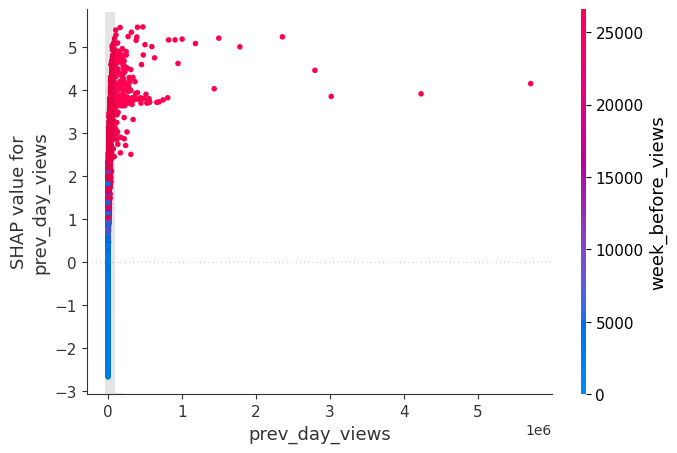

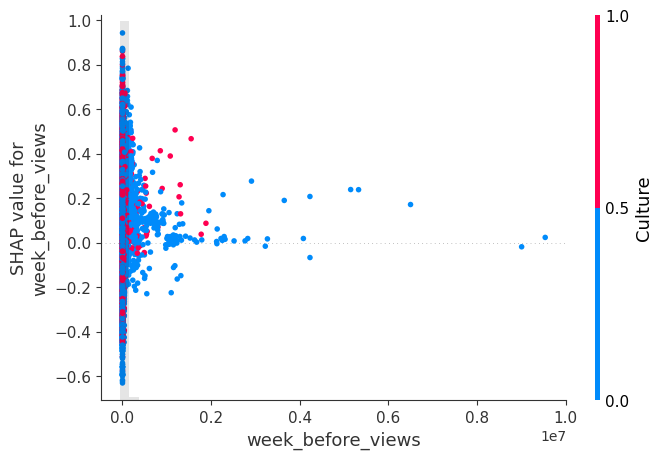

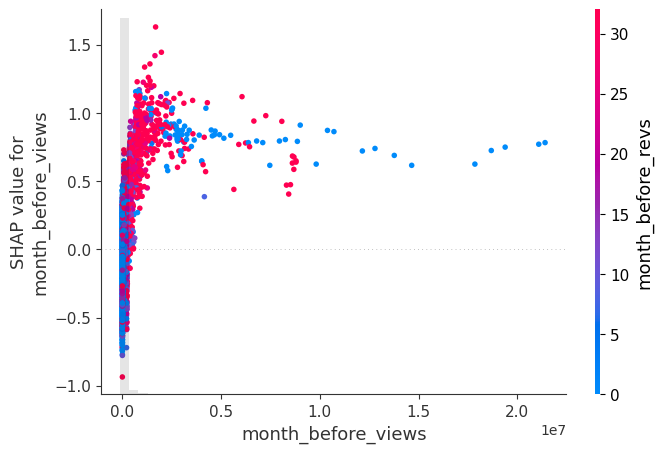

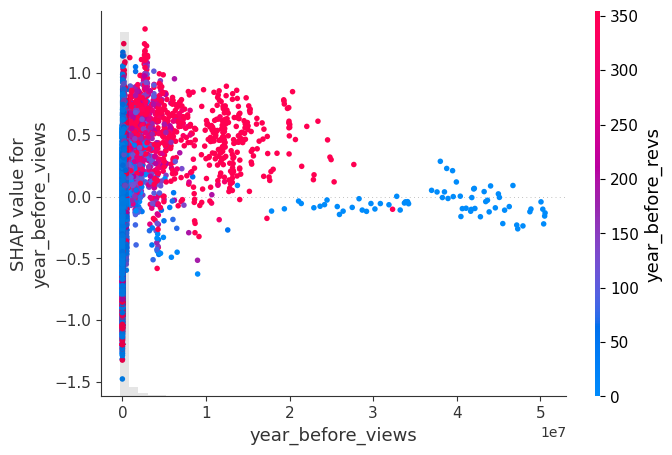

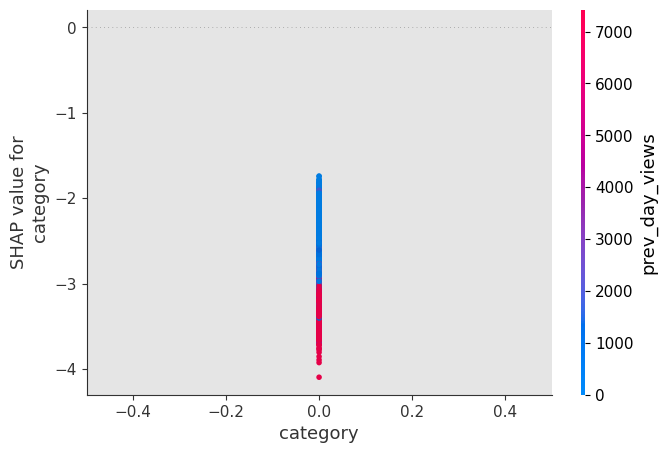

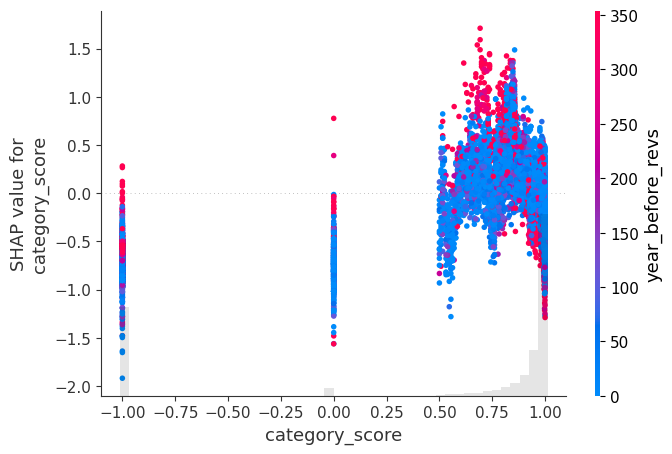

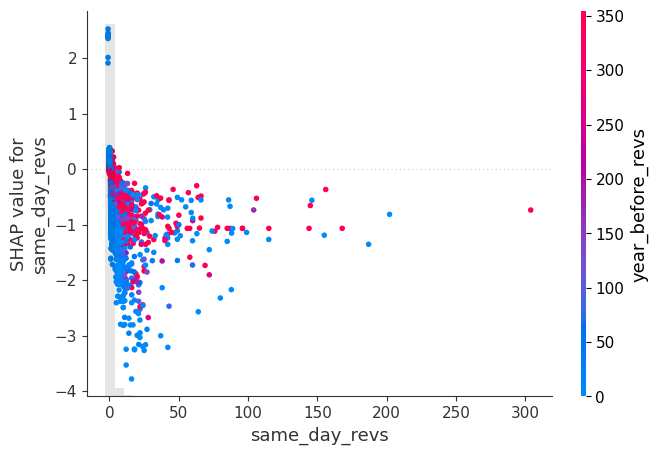

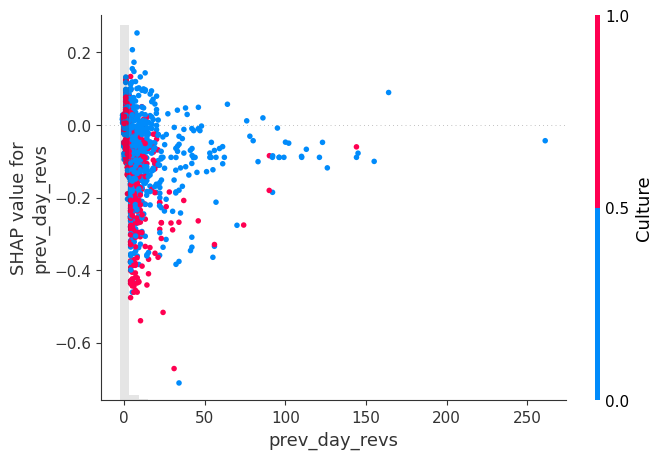

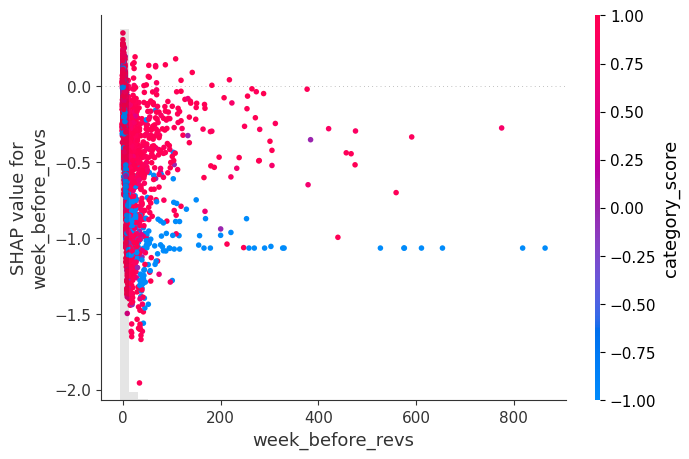

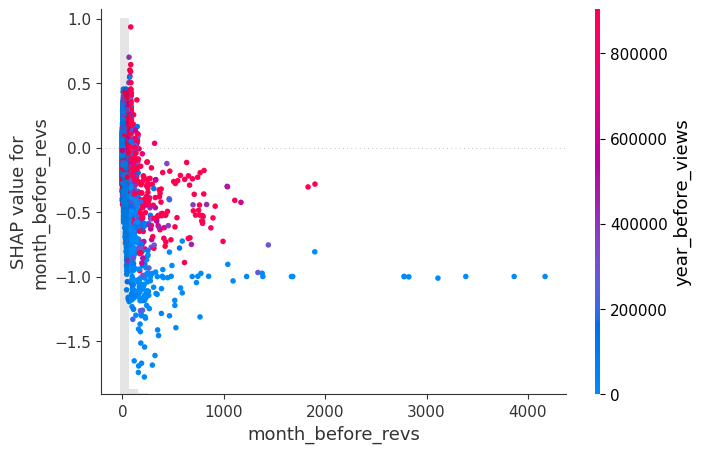

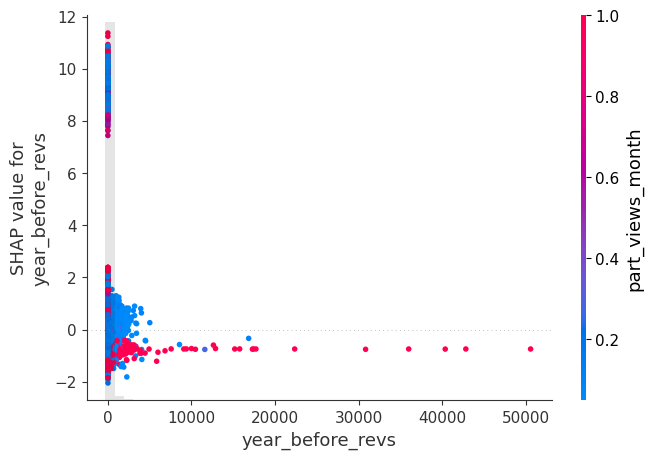

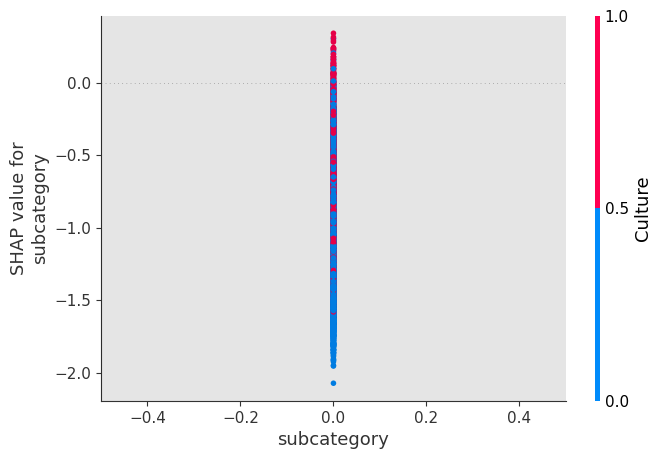

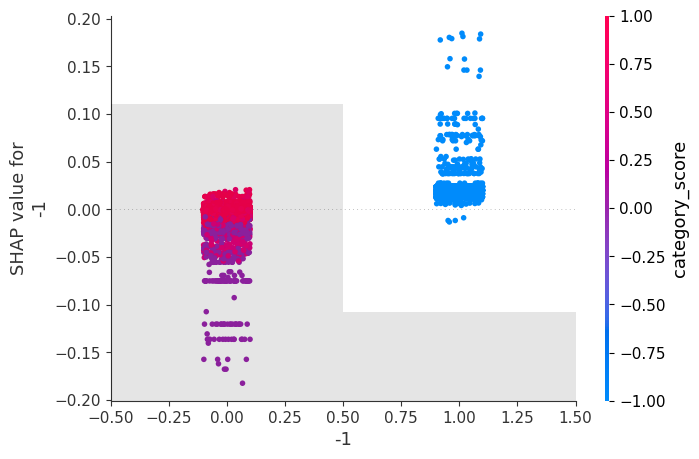

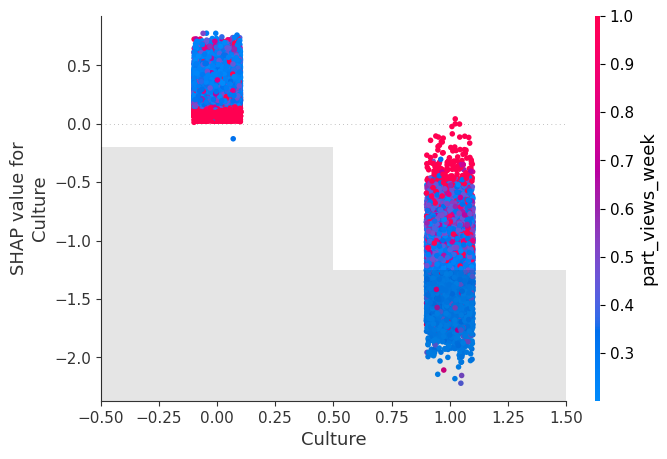

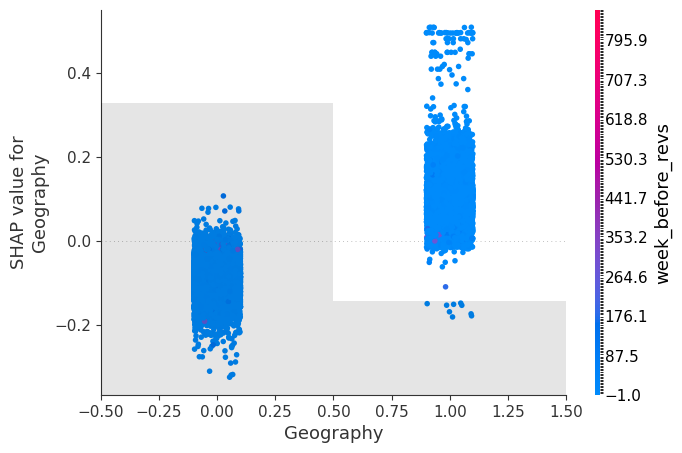

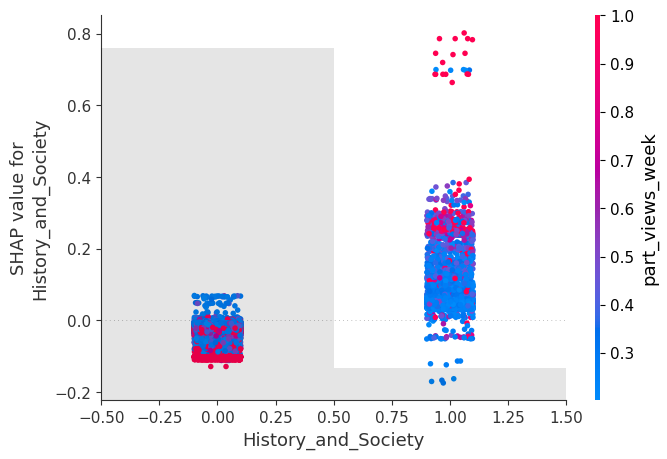

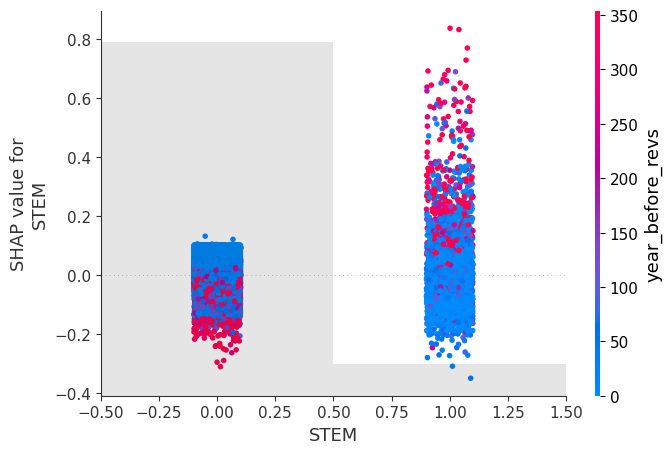

In [ ]:
for i in df_test.columns:
  try:
    shap.plots.scatter(shap_values[:,i], color=shap_values)
  except:
    continue

In [ ]:
shap.initjs()


In [ ]:
y_pred_xg[1]

0.14270282

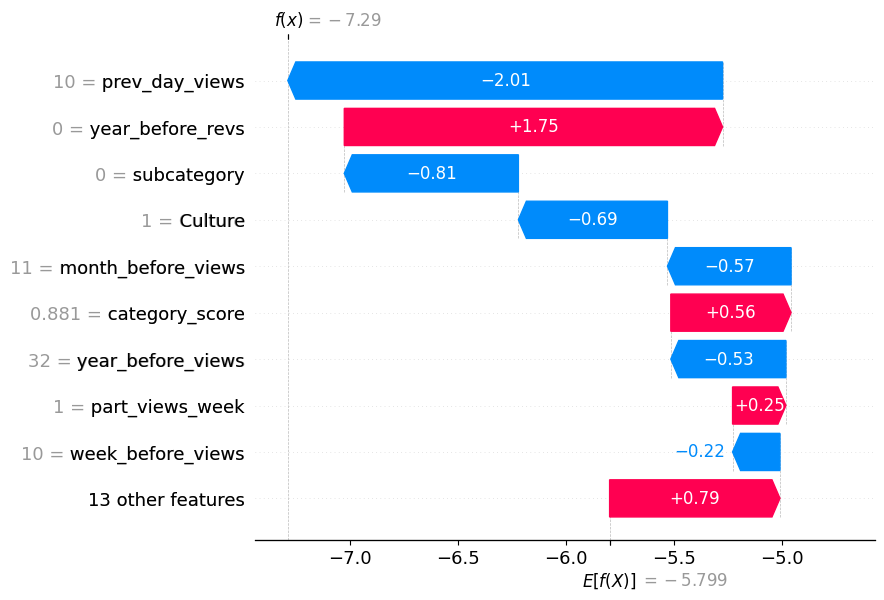

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[5567])

# Baseline metrics

In [ ]:
np.array((X_test['same_day_revs']/max(X_test['same_day_revs'])).fillna(0))

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
import numpy as np
import bctools as bc
pred_revs = np.array((X_test['same_day_revs']/max(X_test['same_day_revs'])).fillna(0))
threshold_values = np.arange(0, 1, 0.05)
bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = pred_revs,
    N_subsets = 70,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)

optimized_metric  GHOST_optimal_threshold
0            kappa                     0.05
1              mcc                     0.05
2         f1_score                     0.00
3         f2_score                     0.00
4        f05_score                     0.05

In [ ]:
threshold_values = np.arange(0, 0.05, 0.0001)
bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = pred_revs,
    N_subsets = 70,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)

optimized_metric  GHOST_optimal_threshold
0            kappa                   0.0033
1              mcc                   0.0033
2         f1_score                   0.0001
3         f2_score                   0.0000
4        f05_score                   0.0033

In [ ]:
pred_revs = np.array((X_test['same_day_revs']/max(X_test['same_day_revs'])).fillna(0))
threashold = 0.0001
predictions = [int(value>threashold) for value in pred_revs]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, predictions))

Accuracy: 80.84%
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     31414
           1       0.17      0.28      0.21      3180

    accuracy                           0.81     34594
   macro avg       0.54      0.57      0.55     34594
weighted avg       0.85      0.81      0.83     34594



In [ ]:
threshold_values = np.arange(0, 1, 0.05)
pred_views = np.array((X_test['prev_day_views']/max(X_test['prev_day_views'])).fillna(0))
bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = pred_views,
    N_subsets = 70,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)

optimized_metric  GHOST_optimal_threshold
0            kappa                      0.0
1              mcc                      0.0
2         f1_score                      0.0
3         f2_score                      0.0
4        f05_score                      0.0

In [ ]:
threshold_values = np.arange(0, 0.05, 0.0001)
bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = pred_views,
    N_subsets = 70,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)

optimized_metric  GHOST_optimal_threshold
0            kappa                   0.0006
1              mcc                   0.0011
2         f1_score                   0.0004
3         f2_score                   0.0001
4        f05_score                   0.0015

In [ ]:

pred_views = np.array((X_test['prev_day_views']/max(X_test['prev_day_views'])).fillna(0))
threashold = 0.0004
predictions = [int(value>threashold) for value in pred_views]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, predictions))

Accuracy: 91.13%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     31414
           1       0.52      0.55      0.53      3180

    accuracy                           0.91     34594
   macro avg       0.74      0.75      0.74     34594
weighted avg       0.91      0.91      0.91     34594



# Optimized xg

In [ ]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

# Classifier:
def hyperparameter_tuning(space):
    model = XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'], objective = "binary:logistic"
                         ,reg_alpha = int(space['reg_alpha']),min_child_weight=space['min_child_weight'],colsample_bytree=space['colsample_bytree']
                         )
    print("here")
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="logloss",
                 
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test)
    f1 = f1_score(y_test, pred)
    print ("SCORE:", f1)
    #change the metric if you like
    return {'loss': -f1, 'status': STATUS_OK, 'model': model}

In [ ]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

here
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5924672027084215
here
  1%|          | 1/100 [00:06<10:14,  6.21s/trial, best loss: -0.5924672027084215]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5814940577249577
here
  2%|▏         | 2/100 [00:18<16:01,  9.81s/trial, best loss: -0.5924672027084215]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6241365298659081
here
  3%|▎         | 3/100 [00:30<17:37, 10.90s/trial, best loss: -0.6241365298659081]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6110197368421052
here
  4%|▍         | 4/100 [00:35<13:24,  8.38s/trial, best loss: -0.6241365298659081]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6344193483909654
here
  5%|▌         | 5/100 [00:39<10:50,  6.85s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6220585226110087
here
  6%|▌         | 6/100 [00:47<11:30,  7.35s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6203834510595359
here
  7%|▋         | 7/100 [00:50<08:59,  5.80s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6318758815232722
here
  8%|▊         | 8/100 [00:55<08:38,  5.63s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6043910521955261
here
  9%|▉         | 9/100 [01:02<09:07,  6.01s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6050942224062953
here
 10%|█         | 10/100 [01:11<10:13,  6.82s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6133656369876842
here
 11%|█         | 11/100 [01:14<08:25,  5.68s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6011200995644058
here
 12%|█▏        | 12/100 [01:17<07:27,  5.09s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5595134665508255
here
 13%|█▎        | 13/100 [01:30<10:38,  7.34s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5928406949968599
here
 14%|█▍        | 14/100 [01:38<11:01,  7.69s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6041753653444676
here
 15%|█▌        | 15/100 [01:43<09:44,  6.88s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6122699386503068
here
 16%|█▌        | 16/100 [01:48<08:41,  6.20s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.622585142401912
here
 17%|█▋        | 17/100 [01:54<08:36,  6.22s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5897489981016664
here
 18%|█▊        | 18/100 [02:01<08:49,  6.45s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5935266918873476
here
 19%|█▉        | 19/100 [02:11<10:05,  7.48s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6179455948030858
here
 20%|██        | 20/100 [02:13<07:51,  5.89s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6131386861313869
here
 21%|██        | 21/100 [02:18<07:20,  5.58s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6196046793061718
here
 22%|██▏       | 22/100 [02:23<06:56,  5.34s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6143790849673202
here
 23%|██▎       | 23/100 [02:27<06:11,  4.83s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6282595512431777
here
 24%|██▍       | 24/100 [02:32<06:18,  4.98s/trial, best loss: -0.6344193483909654]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6358244365361804
here
 25%|██▌       | 25/100 [02:37<06:05,  4.87s/trial, best loss: -0.6358244365361804]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6462384600274995
here
 26%|██▌       | 26/100 [02:39<05:09,  4.18s/trial, best loss: -0.6462384600274995]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6223541048466864
here
 27%|██▋       | 27/100 [02:42<04:27,  3.66s/trial, best loss: -0.6462384600274995]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6289078359723914
here
 28%|██▊       | 28/100 [02:48<05:23,  4.49s/trial, best loss: -0.6462384600274995]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.640711462450593
here
 29%|██▉       | 29/100 [02:51<04:47,  4.05s/trial, best loss: -0.6462384600274995]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.627609973646868
here
 30%|███       | 30/100 [02:55<04:35,  3.93s/trial, best loss: -0.6462384600274995]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6624617737003058
here
 31%|███       | 31/100 [02:59<04:39,  4.05s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6185397867104184
here
 32%|███▏      | 32/100 [03:07<05:46,  5.10s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6205201720253942
here
 33%|███▎      | 33/100 [03:10<05:16,  4.73s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.625929648241206
here
 34%|███▍      | 34/100 [03:20<06:39,  6.06s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6439081812831077
here
 35%|███▌      | 35/100 [03:23<05:44,  5.30s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6150687743789776
here
 36%|███▌      | 36/100 [03:33<06:57,  6.53s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.633460534243824
here
 37%|███▋      | 37/100 [03:36<06:02,  5.75s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6190476190476191
here
 38%|███▊      | 38/100 [03:46<07:05,  6.87s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6138533414584604
here
 39%|███▉      | 39/100 [03:54<07:15,  7.14s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6307037112147637
here
 40%|████      | 40/100 [04:03<07:43,  7.72s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6124401913875598
here
 41%|████      | 41/100 [04:12<07:57,  8.10s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.61832216128377
here
 42%|████▏     | 42/100 [04:14<06:12,  6.43s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.620731217356368
here
 43%|████▎     | 43/100 [04:16<04:52,  5.13s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6204364674688966
here
 44%|████▍     | 44/100 [04:21<04:33,  4.88s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6321700762133975
here
 45%|████▌     | 45/100 [04:27<04:50,  5.28s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5824246311738294
here
 46%|████▌     | 46/100 [04:35<05:37,  6.25s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6212367778681854
here
 47%|████▋     | 47/100 [04:42<05:38,  6.39s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6151005334427575
here
 48%|████▊     | 48/100 [04:48<05:23,  6.22s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5848252344416027
here
 49%|████▉     | 49/100 [04:56<05:51,  6.90s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6045267489711934
here
 50%|█████     | 50/100 [05:03<05:35,  6.71s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5937170567151592
here
 51%|█████     | 51/100 [05:09<05:22,  6.59s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6321514907332796
here
 52%|█████▏    | 52/100 [05:13<04:42,  5.89s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6142798522773902
here
 53%|█████▎    | 53/100 [05:22<05:11,  6.63s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6378763866877972
here
 54%|█████▍    | 54/100 [05:25<04:22,  5.71s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6030456852791879
here
 55%|█████▌    | 55/100 [05:28<03:32,  4.73s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5798663505065746
here
 56%|█████▌    | 56/100 [05:35<03:55,  5.35s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5982905982905983
here
 57%|█████▋    | 57/100 [05:42<04:16,  5.96s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6320125539427226
here
 58%|█████▊    | 58/100 [05:49<04:23,  6.26s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6289510771089188
here
 59%|█████▉    | 59/100 [05:55<04:13,  6.17s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6600351082504388
here
 60%|██████    | 60/100 [06:05<04:57,  7.43s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6483603318846306
here
 61%|██████    | 61/100 [06:09<04:06,  6.32s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6502073869247482
here
 62%|██████▏   | 62/100 [06:17<04:19,  6.84s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6158806932688432
here
 63%|██████▎   | 63/100 [06:21<03:41,  5.98s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6072808623144195
here
 64%|██████▍   | 64/100 [06:24<03:00,  5.01s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6168831168831168
here
 65%|██████▌   | 65/100 [06:27<02:42,  4.64s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6374421878141966
here
 66%|██████▌   | 66/100 [06:35<03:12,  5.66s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6104003301692118
here
 67%|██████▋   | 67/100 [06:39<02:46,  5.03s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6376054640417838
here
 68%|██████▊   | 68/100 [06:47<03:05,  5.79s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6021730045967405
here
 69%|██████▉   | 69/100 [06:54<03:15,  6.31s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6283756549778315
here
 70%|███████   | 70/100 [07:01<03:12,  6.42s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6151975683890578
here
 71%|███████   | 71/100 [07:04<02:35,  5.35s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6092634156294634
here
 72%|███████▏  | 72/100 [07:08<02:19,  4.97s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6079699561861047
here
 73%|███████▎  | 73/100 [07:17<02:46,  6.15s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5959680806383872
here
 74%|███████▍  | 74/100 [07:24<02:52,  6.62s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6278150928486763
here
 75%|███████▌  | 75/100 [07:28<02:25,  5.82s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6272141706924316
here
 76%|███████▌  | 76/100 [07:35<02:22,  5.95s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6037735849056604
here
 77%|███████▋  | 77/100 [07:41<02:21,  6.17s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6190769230769232
here
 78%|███████▊  | 78/100 [07:48<02:16,  6.21s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.619352176604085
here
 79%|███████▉  | 79/100 [07:59<02:41,  7.68s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6027060270602707
here
 80%|████████  | 80/100 [08:02<02:04,  6.24s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6036648136709902
here
 81%|████████  | 81/100 [08:09<02:08,  6.74s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6386621540911805
here
 82%|████████▏ | 82/100 [08:16<01:59,  6.62s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6289866774323779
here
 83%|████████▎ | 83/100 [08:22<01:50,  6.48s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6059225512528474
here
 84%|████████▍ | 84/100 [08:25<01:27,  5.44s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6048353480616924
here
 85%|████████▌ | 85/100 [08:31<01:22,  5.48s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6321723374270183
here
 86%|████████▌ | 86/100 [08:37<01:21,  5.81s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6490375267353685
here
 87%|████████▋ | 87/100 [08:40<01:04,  4.95s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6161309884778654
here
 88%|████████▊ | 88/100 [08:44<00:55,  4.64s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6317073170731707
here
 89%|████████▉ | 89/100 [08:54<01:07,  6.16s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6006669445602334
here
 90%|█████████ | 90/100 [09:03<01:10,  7.08s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6151309008451866
here
 91%|█████████ | 91/100 [09:06<00:52,  5.85s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6025535420098848
here
 92%|█████████▏| 92/100 [09:10<00:42,  5.28s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6004973062577704
here
 93%|█████████▎| 93/100 [09:17<00:41,  5.95s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5888026840008388
here
 94%|█████████▍| 94/100 [09:22<00:33,  5.56s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.620507614213198
here
 95%|█████████▌| 95/100 [09:26<00:25,  5.17s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6210849539406346
here
 96%|█████████▌| 96/100 [09:35<00:24,  6.25s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6325654041390082
here
 97%|█████████▋| 97/100 [09:38<00:15,  5.15s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.5933514530629311
here
 98%|█████████▊| 98/100 [09:47<00:12,  6.31s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.597451430958847
here
 99%|█████████▉| 99/100 [09:54<00:06,  6.60s/trial, best loss: -0.6624617737003058]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.6205375050140394
100%|██████████| 100/100 [09:59<00:00,  5.99s/trial, best loss: -0.6624617737003058]
{'colsample_bytree': 0.6128770382229363, 'gamma': 1.6368562956170467, 'max_depth': 3.0, 'min_child_weight': 8.0, 'reg_alpha': 50.0, 'reg_lambda': 0.6648060838925559}


# Results visualization

In [ ]:
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc, roc_curve


precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig = px.area(
    x=recall, y=precision,
    title=f"Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})",
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

In [ ]:
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [ ]:
import plotly.figure_factory as ff
import numpy as np
hist_data = [y_pred[y_pred>0.01]]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [ ]:
len(y_pred[y_pred>0.8])

932

In [ ]:
df_test[y_pred>0.9]['page_title'][:50] #model define as news

8347                                               Russia
8161                     2022_Russian_invasion_of_Ukraine
3625                     2022_anti-war_protests_in_Russia
8079                        Northeastern_Ukraine_campaign
6393                             Nigerian_bandit_conflict
7464                     Islamist_insurgency_in_the_Sahel
2255                                            Hong_Kong
3627      2019%E2%80%93present_Sri_Lankan_economic_crisis
1728                                            Hong_Kong
799                    2022_Italian_presidential_election
9278                                               Brazil
8701                  Carlsen%E2%80%93Niemann_controversy
2740                                          Train_crash
1981                                Kyiv_offensive_(2022)
1725                                    COVID-19_pandemic
5681                     2022_Russian_invasion_of_Ukraine
857                                         United_States
2125          

In [ ]:
df_test[y_pred<0.1]['page_title'][:50] #model define as NOT news

83961                  Salt_Water_Barrier_(Delaware_River)
108052                                            Zhuravka
94297                           Top_Billing_(TV_programme)
67684     Meetup/Black_Lunch_Table/New_School_Centennial_1
63566                                   Lochnessmonster567
4315                                                  Sfax
72802                                   Nikolai_Khabibulin
45086                                            Godalming
53347                                Jeanne-Antide_Thouret
20638                        American_literature/Archive_1
2974                     Islamic_Revolutionary_Guard_Corps
12702                                2010s_war_drama_films
105899                                            Wildgirl
56573                                            Kautilya3
54007                                        Joe_McGonagle
51354                                     Interlaced_video
77091                                     Philipp_Hochma

In [ ]:
df_test[(y_pred>0.9)&(y_test==0)]['page_title'][:50] # ,model predicted as news, but it's not

74580     Opinion_polling_for_the_next_United_Kingdom_ge...
18438                                           Afghanistan
39673                                             Elon_Musk
73487                                        Novak_Djokovic
39674                                             Elon_Musk
61979                           List_of_earthquakes_in_2022
105811                                            Wikipedia
94735                                 Treaty_of_Vereeniging
37691                                          Donald_Trump
64524                                           M142_HIMARS
37644                                           Don_Dunstan
Name: page_title, dtype: object

In [ ]:
df_test[(y_pred<0.1)&(y_test==1)]['page_title'][:50] # ,model predicted as NOT news, but it is

4315                                                 Sfax
2974                    Islamic_Revolutionary_Guard_Corps
9205                      China%E2%80%93Germany_relations
8955                Iran%E2%80%93European_Union_relations
9679                       Secretary_of_State_for_Defence
8764                                         Flash_floods
7916    Iran%E2%80%93Israel_conflict_during_the_Syrian...
3236                                            Airstrike
989                            Law_enforcement_in_Germany
9599                                             Asteroid
8551                                            Inflation
9473          Formula_One_drivers_from_the_United_Kingdom
6023                               Anglophone_Cameroonian
449                           COVID-19_pandemic_in_Sweden
4544                                    Military_facility
9767                         Data_Protection_Commissioner
3525                     Deputy_Prime_Minister_of_Ukraine
1871          

# Compare with base sorting

In [ ]:
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc, roc_curve


precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig = px.area(
    x=recall, y=precision,
    title=f"Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})",
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_curve, average_precision_score

# Create an empty figure, and iteratively add new lines
# every time we compute a new class
fig = go.Figure()
# fig.add_shape(
#     type='line', line=dict(dash='dash'),
#     x0=0, x1=1, y0=1, y1=0
# )

pred = [y_pred_lr, y_pred_rf, y_pred_xg,
        (X_test['prev_day_views']/max(X_test['prev_day_views'])).fillna(0),
        (X_test['same_day_revs']/max(X_test['same_day_revs'])).fillna(0)]
names = ['log_reg', 'random_forest', 'xg_boost', 'views', 'revs']
for i in range(5):
    y_true = y_test
    y_score = pred[i]

    precision, recall, _ = precision_recall_curve(y_true, y_score)
    auc_score = average_precision_score(y_true, y_score)

    name = names[i]
    if i<3:
      dash='solid'
    else:
      dash='dash'
    fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines', line=go.scatter.Line(dash=dash)))

fig.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()

In [ ]:
X_test

-1  Culture  Geography  History_and_Society  STEM  category_score  \
91838    0        1          0                    0     0        0.973251   
83961    0        0          1                    0     0        0.998685   
108052   0        0          1                    0     0        0.999642   
94297    0        1          0                    0     0        0.718604   
67684    1        0          0                    0     0       -1.000000   
...     ..      ...        ...                  ...   ...             ...   
10512    1        0          0                    0     0       -1.000000   
92002    0        1          0                    0     0        0.979678   
34801    1        0          0                    0     0       -1.000000   
11751    0        1          0                    0     0        0.699264   
86958    0        1          0                    0     0        0.994950   

        category  subcategory  before  prev_day_views  week_before_views  \
91838          0            0   27570           10437              43196   
83961          0            0      12               9                 25   
108052         0            0      34               3                 42   
94297          0            0     100              37                157   
67684          0            0      -1              -1                 -1   
...          ...          ...     ...             ...                ...   
10512          0            0      -1              -1                 -1   
92002          0            0    2419            1136               3850   
34801          0            0      -1              -1                 -1   
11751          0            0      61              54                191   
86958          0            0    8504            3313              13475   

        month_before_views  year_before_views  same_day_revs  prev_day_revs  \
91838               150663            1549969            0.0            0.0   
83961                   82                969            0.0            0.0   
108052                  92                855            0.0            0.0   
94297                  592               9082            0.0            0.0   
67684                   -1                 -1            0.0            0.0   
...                    ...                ...            ...            ...   
10512                   -1                 -1            0.0            0.0   
92002                 9728             108852            0.0            1.0   
34801                   -1                 -1            0.0            0.0   
11751                  476               3286            0.0            0.0   
86958                50889             690193            2.0            0.0   

        week_before_revs  month_before_revs  year_before_revs  
91838                1.0               23.0             151.0  
83961                0.0                0.0               0.0  
108052               0.0                0.0               1.0  
94297                0.0                1.0               9.0  
67684                0.0                0.0               4.0  
...                  ...                ...               ...  
10512                0.0                0.0               0.0  
92002                1.0                4.0              46.0  
34801                0.0                0.0               4.0  
11751                4.0               10.0              62.0  
86958                0.0                8.0              94.0  

[35782 rows x 18 columns]

In [ ]:
(X_test['prev_day_views']/max(X_test['prev_day_views'])).fillna(0)

91838     1.827346e-03
83961     1.575751e-06
108052    5.252503e-07
94297     6.478087e-06
67684    -1.750834e-07
              ...     
10512    -1.750834e-07
92002     1.988948e-04
34801    -1.750834e-07
11751     9.454505e-06
86958     5.800514e-04
Name: prev_day_views, Length: 35782, dtype: float64

# Feature imp

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 30.8 MB/s eta 0:00:00


In [ ]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

NameError: ignored